In this notebook we perform the different classification tasks to determine which one is the best.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Metrics for Performance Evaluation

In [75]:
class Performance_metrics():

    def __init__(self, y_actual, y_predicted, ctp=-1, ctn=0, cfp=1, cfn=10):

        self.y_actual = y_actual # df of actual class labels
        self.y_predicted = y_predicted # df of predicted class labels

        self.df_confusion = pd.crosstab(self.y_actual, self.y_predicted)
        self.tp = self.df_confusion[1][1]
        self.tn = self.df_confusion[0][0]
        self.fp = self.df_confusion[0][1]
        self.fn = self.df_confusion[1][0]

        self.ctp = ctp
        self.ctn = ctn
        self.cfp = cfp
        self.cfn = cfn
        

    def cost_matrix(self):

        """Cost of classifying instances of class j as class i.
        """

        cost_matrix = np.array([[self.ctn, self.cfp], [self.cfn, self.ctp]])
        return cost_matrix
    
    def accuracy(self):

        """Accuracy of the model.
        """
        accuracy = (self.tp + self.tn) / (self.tp + self.tn + self.fp + self.fn)
        return accuracy
    
    def cost(self):

        """Cost of the model.
        """
        cost_matrix = np.array([[self.ctn, self.cfp], [self.cfn, self.ctp]])

        cost = (self.tp * self.ctp) + (self.tn * self.ctn) + (self.fp * self.cfp) + (self.fn * self.cfn)
        return cost
    
    def precision(self):
            
        """Precision of the model.
        """
        precision = self.tp / (self.tp + self.fp)
        return precision
    
    def recall(self):
        
        """Recall of the model.
        """
        recall = self.tp / (self.tp + self.fn)
        return recall
    
    def f_measure(self):
    
        """F-measure of the model.
        """

        f_measure = 2*self.tp / (2*self.tp + self.fp + self.fn)
        return f_measure
    

In [76]:
# Import data
df = pd.read_csv("Preprocessed data/normalized_data.csv", index_col=0)

dFeat_df = df.drop(columns = ["readmitted"])
dClass_df = df["readmitted"]

dFeat = dFeat_df.to_numpy()
dClass = dClass_df.to_numpy()

print(dFeat.shape)
print(dClass.shape)

(4837, 30)
(4837,)


# Feature Selection

## Wrapper method

In this work we are going to use Wrapper methods since they provide a balance between embedded aproaches (which depends on the algorithm) and filter approaches (which rely on statistical measures). First, we measure the variation in accuracy after removing each feature, for simplicity, we only consider random forest.

In [77]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Compute the accuracy of the model using K-fold cross-validation

# Accuracy_base = []

# for train_index, test_index in kf.split(dFeat, dClass):

#     X_train, X_test = dFeat[train_index], dFeat[test_index]
#     y_train, y_test = dClass[train_index], dClass[test_index]

#     # Create a Random Forest Classifier
#     rf = RandomForestClassifier(n_estimators=1000, random_state=42, criterion='entropy')

#     # Fit the model on the training data
#     rf.fit(X_train, y_train)

#     # Make predictions on the test data
#     y_pred = rf.predict(X_test)

#     # Calculate performance metrics
#     pm = Performance_metrics(y_test, y_pred)
#     Accuracy_base.append(pm.accuracy())

# Accuracy_base = np.mean(Accuracy_base)
# print("Accuracy with all the features: ", Accuracy_base)

# accuracy_drop = []

# for i in range(dFeat.shape[1]):

#     column = dFeat_df.columns[i]

#     dFeat1 = np.delete(dFeat, i, axis=1)
#     accuracy_list = []

#     for train_index, test_index in kf.split(dFeat1, dClass):

#         X_train, X_test = dFeat1[train_index], dFeat1[test_index]
#         y_train, y_test = dClass[train_index], dClass[test_index]

#         # Create a Random Forest Classifier
#         rf = RandomForestClassifier(n_estimators=1000, random_state=42, criterion='entropy')

#         # Fit the model on the training data
#         rf.fit(X_train, y_train)

#         # Make predictions on the test data
#         y_pred = rf.predict(X_test)

#         # Calculate performance metrics
#         pm = Performance_metrics(y_test, y_pred)
#         accuracy_list.append(pm.accuracy())

#     acc = np.mean(accuracy_list)
#     print("Accuracy without ", column, ": ", acc)

#     accuracy_drop.append(Accuracy_base - acc)

In [78]:
# accuracy_drop_df = pd.DataFrame(accuracy_drop, index=dFeat_df.columns, columns=["Accuracy drop"])
# accuracy_drop_df = accuracy_drop_df.sort_values(by="Accuracy drop", ascending=False)

# accuracy_drop_df.plot(kind='bar', legend=False, figsize=(12, 6))
# plt.ylabel('Accuracy drop')
# plt.title('Accuracy drop with feature removal')
# plt.xticks(rotation=90)
# plt.tight_layout()

## Mean decrease in impurity

Another metric in RF classifier is the MDI (Mean Decrease impurity) which counts the number of times a feature is used to a split a node weighted by the number of samples it splits. [cite web]

Text(0, 0.5, 'Mean decrease in impurity')

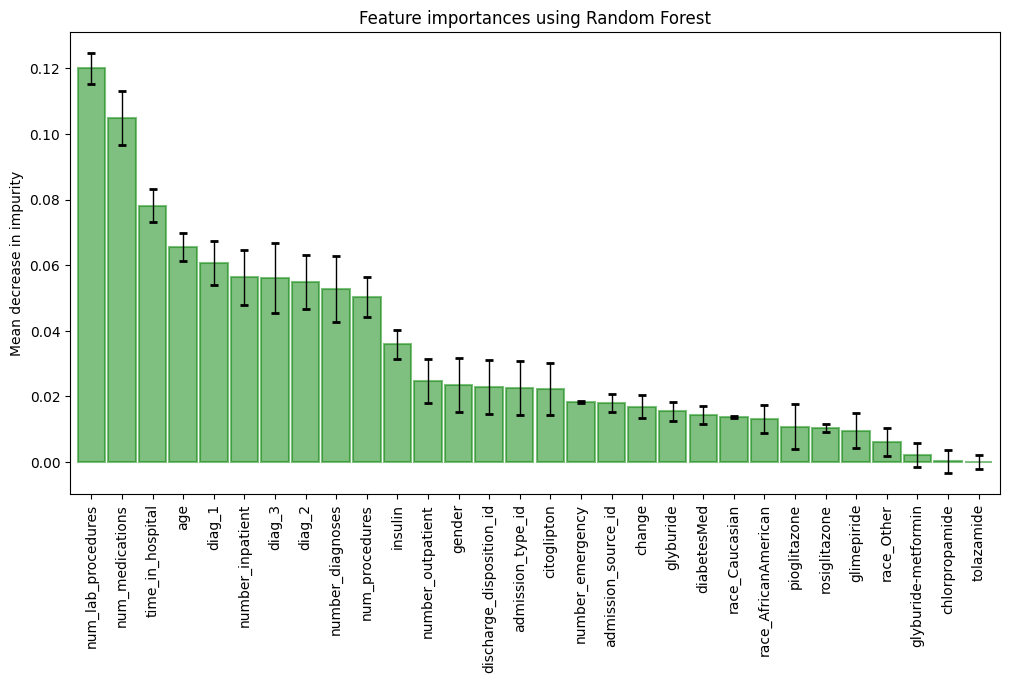

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

forest = RandomForestClassifier(n_estimators=1000, random_state=42, criterion='entropy')
forest.fit(dFeat, dClass)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.DataFrame(importances, index=dFeat_df.columns, columns=["Importance"])
forest_importances = forest_importances.sort_values(by="Importance", ascending=False)

forest_importances.plot.bar(yerr=std, legend=False, figsize=(12, 6), color='green', alpha=0.5, edgecolor='green', capsize=5, error_kw=dict(lw=1, capsize=3, capthick=2), width=0.9, lw=1.5)
plt.title("Feature importances using Random Forest") 
plt.xticks(rotation=90)
plt.ylabel("Mean decrease in impurity")

## Feature Permutation

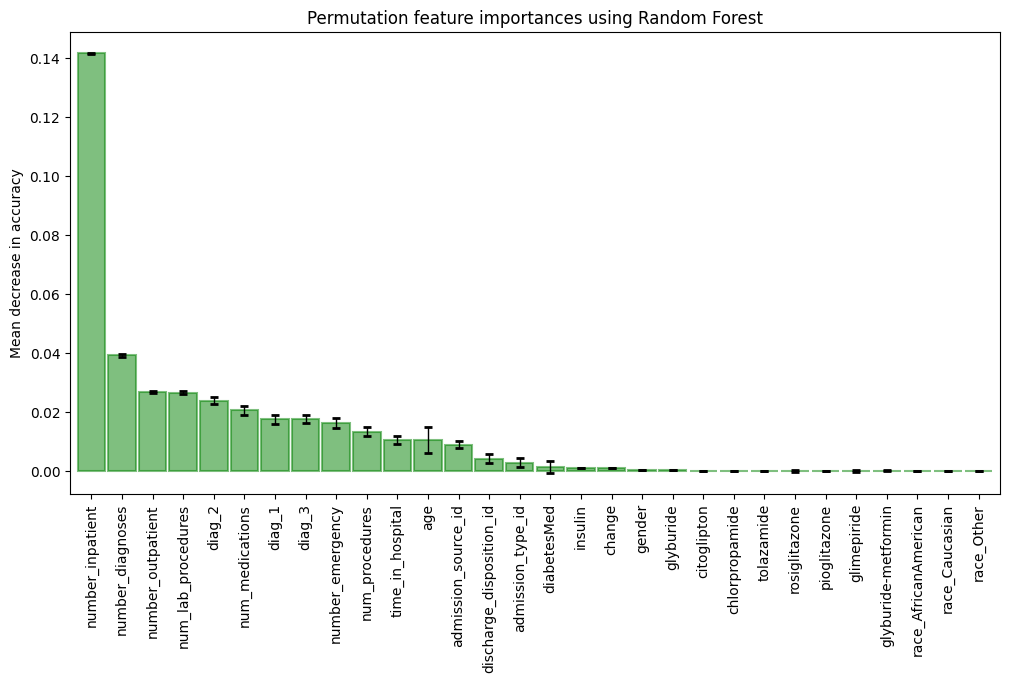

In [87]:
from sklearn.inspection import permutation_importance

result = permutation_importance(forest, dFeat, dClass, n_repeats=10, random_state=42)
forest_permutations = pd.DataFrame(result.importances_mean, index=dFeat_df.columns, columns=["Permutation Importance"])
forest_permutations = forest_permutations.sort_values(by="Permutation Importance", ascending=False)

forest_permutations.plot.bar(yerr=result.importances_std, legend=False, figsize=(12, 6), color='green', alpha=0.5, edgecolor='green', capsize=5, error_kw=dict(lw=1, capsize=3, capthick=2), width=0.9, lw=1.5)
plt.title("Permutation feature importances using Random Forest")
plt.xticks(rotation=90)
plt.ylabel("Mean decrease in accuracy")
plt.show()

In [88]:
# Delete the follwoing features according to the analysis above
dFeat_df = dFeat_df.drop(columns=["race_Other", "race_Caucasian", "race_AfricanAmerican", "glyburide-metformin", "glimepiride", "pioglitazone", "rosiglitazone", "tolazamide", "chlorpropamide", "citoglipton", "glyburide"])
dFeat = dFeat_df.to_numpy()

# ROC curve

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models_dict = {
    "RF": RandomForestClassifier(n_estimators=1000, random_state=42, criterion='entropy'), # Random Forest
    "DT": DecisionTreeClassifier(random_state=42, criterion='entropy'), # Decision Tree
    "KNN": KNeighborsClassifier(n_neighbors=5), # K-Nearest Neighbors
    "GNB": GaussianNB(), # Gaussian Naive Bayes
    "SVC": SVC(random_state=42, probability=True), # Support Vector Classifier
    "LR": LogisticRegression(random_state=42, max_iter=1000), # Logistic Regression
}

In [92]:
# Now we compute the ROC curve and AUC for the different classifiers
from sklearn.metrics import roc_curve, auc

kf = KFold(n_splits=10, shuffle=True, random_state=42)

Roc_dict = {
    "RF": [],
    "DT": [],
    "KNN": [],
    "GNB": [],
    "SVC": [],
    "LR": []
}

# Compute each classification task
for clf_name, clf in models_dict.items():

    print(f"Classifier: {clf_name}")
    
    # Store the ROC curve data for each fold
    fpr_list = []
    tpr_list = []
    thresholds_list = []
    roc_auc_list = []

    # Compute the ROC curve and AUC for each fold
    for train_index, test_index in kf.split(dFeat, dClass):

        X_train, X_test = dFeat[train_index], dFeat[test_index]
        y_train, y_test = dClass[train_index], dClass[test_index]

        # Create a Random Forest Classifier
        model = clf

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Calculate the ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)

        fpr_list.append(fpr)
        tpr_list.append(tpr)
        thresholds_list.append(thresholds)
        roc_auc_list.append(roc_auc)

    # Calculate the mean ROC curve and AUC
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)
    mean_tpr[0] = 0.0
    mean_auc = np.mean(roc_auc_list)

    Roc_dict[clf_name].append((mean_fpr, mean_tpr, mean_auc))

Classifier: RF
Classifier: DT
Classifier: KNN
Classifier: GNB
Classifier: SVC
Classifier: LR


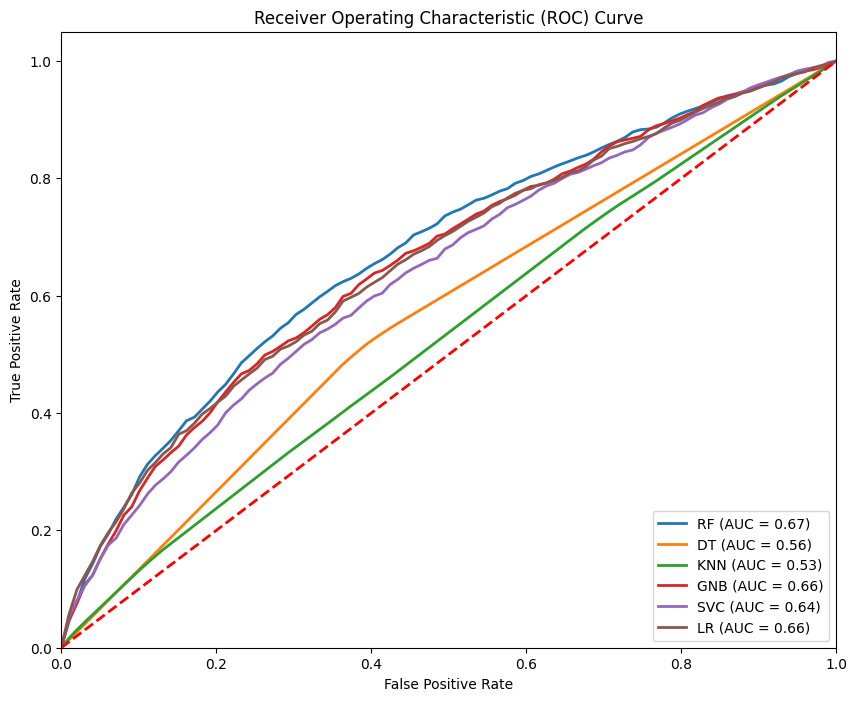

In [96]:
# Plotting the ROC curves for each classifier
plt.figure(figsize=(10, 8))

for clf_name, meas_list in Roc_dict.items():
    mean_fpr = meas_list[0][0]
    mean_tpr = meas_list[0][1]
    mean_auc = meas_list[0][2]
    plt.plot(mean_fpr, mean_tpr, label='{} (AUC = {:.2f})'.format(clf_name, mean_auc), lw=2)

plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Model test

In [40]:
# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)
accuracy = []
cost = []
precision = []
recall = []
f_measure = []

for train_index, test_index in kf.split(dFeat, dClass):

    X_train, X_test = dFeat[train_index], dFeat[test_index]
    y_train, y_test = dClass[train_index], dClass[test_index]

    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    pm = Performance_metrics(y_test, y_pred)
    accuracy.append(pm.accuracy())
    cost.append(pm.cost())
    precision.append(pm.precision())
    recall.append(pm.recall())
    f_measure.append(pm.f_measure())

print("Accuracy: ", np.mean(accuracy))
print("Cost: ", np.mean(cost))
print("Precision: ", np.mean(precision))
print("Recall: ", np.mean(recall))
print("F-measure: ", np.mean(f_measure))


Accuracy:  0.5201538250945366
Cost:  1103.9
Precision:  0.41921810196773934
Recall:  0.4576707033118753
F-measure:  0.4369644190577163
